In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,4)
plt.rcParams["axes.grid"] = True

In [2]:
df = pd.read_csv("../data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.drop("Id", axis=1, inplace=True)

In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 80)

In [6]:
df.drop_duplicates().shape

(1460, 80)

## Поиск пустых значений

In [7]:
na = df.isna().sum().sort_values(ascending=False)
na = na[na>0]
na.to_frame("count_nan")
na = na.map(lambda x: x/len(df))
na

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

Text(0.5, 1.0, 'Count NaN in columns')

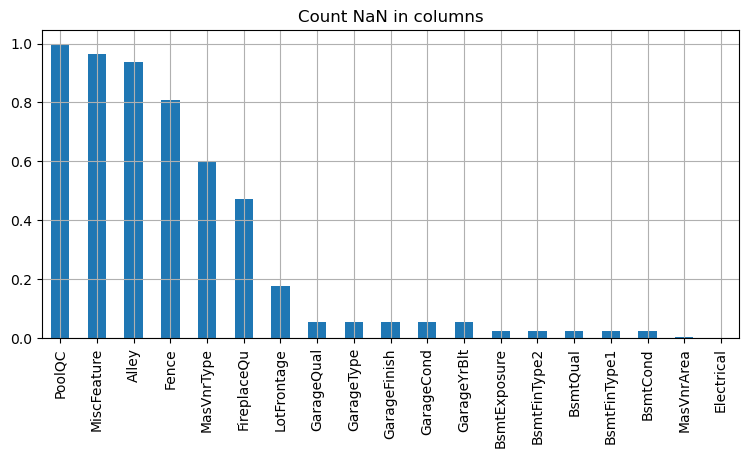

In [8]:
na.plot(kind="bar")
plt.title("Count NaN in columns")

## Удаление редких

In [9]:
for feature in na.index:
    if na[feature] > 0.8:
        df = df.drop(feature, axis=1)

## Обработка категорий

In [10]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [11]:
cat_cols = cat_cols.union(["MSSubClass", "MoSold", "YrSold"])
num_cols = num_cols.difference(["MSSubClass", "MoSold", "YrSold"])

In [12]:
for c in cat_cols:
    df[c] = df[c].astype("category")

In [13]:
card = df[cat_cols].nunique().sort_values(ascending=False)
card

Neighborhood     25
Exterior2nd      16
Exterior1st      15
MSSubClass       15
MoSold           12
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
Heating           6
SaleCondition     6
RoofStyle         6
Foundation        6
GarageType        6
BsmtFinType2      6
BsmtFinType1      6
YrSold            5
MSZoning          5
GarageCond        5
LotConfig         5
BldgType          5
Electrical        5
HeatingQC         5
FireplaceQu       5
GarageQual        5
ExterCond         5
BsmtExposure      4
BsmtCond          4
LotShape          4
BsmtQual          4
KitchenQual       4
ExterQual         4
LandContour       4
MasVnrType        3
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64

In [14]:
for c in cat_cols:
    vc = df[c].value_counts(normalize=True)
    if "other" not in df[c].cat.categories:
        df[c] = df[c].cat.add_categories("other")
    df[c] = df[c].where(df[c].isin(vc[vc>=0.02].index), "other")
    #print(df[c].isin(["other"]).sum())

## Анализ цен

Text(0.5, 1.0, 'Target distribution')

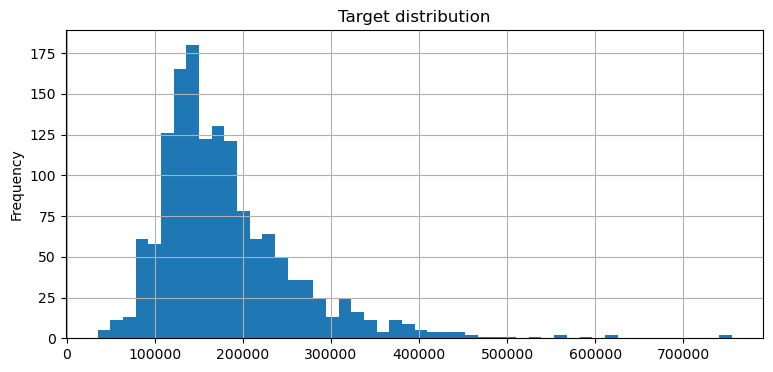

In [15]:
y_col = "SalePrice"
df[y_col].plot(kind="hist", bins=50)
plt.title("Target distribution")

Text(0.5, 1.0, 'log1p target distribution')

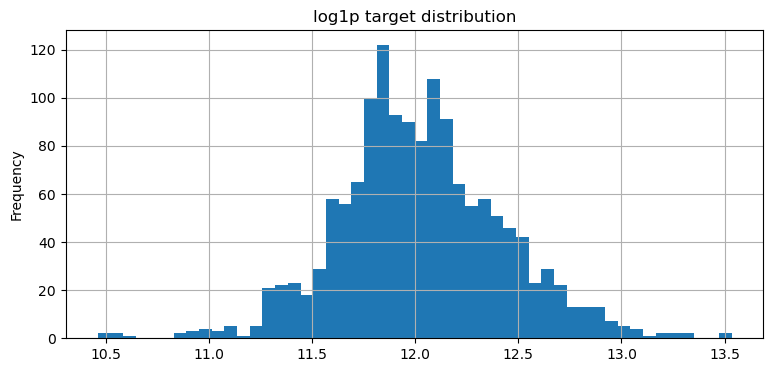

In [16]:
log_y = np.log1p(df[y_col])
log_y.plot(kind="hist", bins=50)
plt.title("log1p target distribution")

## Числовые признаки: распределения, выбросы, корреляции

In [17]:
num_cols = [c for c in num_cols if c != y_col]
skews = df[num_cols].skew().sort_values(ascending=False)
skews.head(10)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
dtype: float64

In [18]:
def iqr_outliers(s, k=1.5):
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3-q1
    low, high = q1-k*iqr, q3+k*iqr
    return (s<low)|(s>high)

outlier_share = df[num_cols].apply(lambda s: iqr_outliers(s).mean()).sort_values(ascending=False)
outlier_share.head(10)

EnclosedPorch    0.142466
BsmtFinSF2       0.114384
OverallCond      0.085616
ScreenPorch      0.079452
MasVnrArea       0.065753
LotFrontage      0.060274
BsmtHalfBath     0.056164
OpenPorchSF      0.052740
LotArea          0.047260
KitchenAbvGr     0.046575
dtype: float64

In [19]:
for i in outlier_share.index:
    if outlier_share[i] > 0.1:
        q_low = df[i].quantile(0.01)
        q_high = df[i].quantile(0.99)
        df[i] = df[i].clip(q_low, q_high)

In [20]:
corr = df[num_cols+[y_col]].corr(numeric_only=True)[y_col].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtHalfBath    -0.016844
MiscVal         -0.021190
BsmtFinSF2      -0.022059
LowQualFinSF    -0.025606
OverallCond     -0.077856
KitchenAbvGr    -0.135907
EnclosedPorch   -0.138947
Name: SalePrice, dtype: float64

In [21]:
for i in corr.index:
    if np.abs(corr[i]) < 0.1:
        df.drop(i, axis=1)

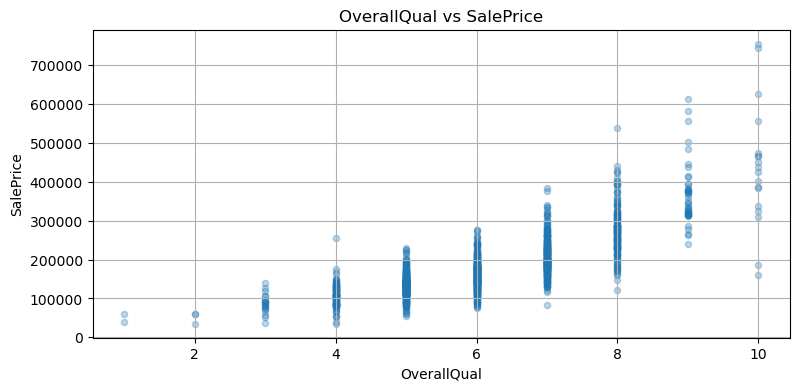

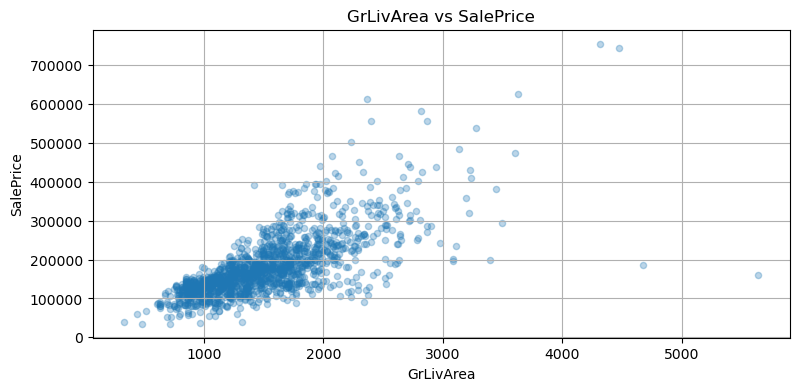

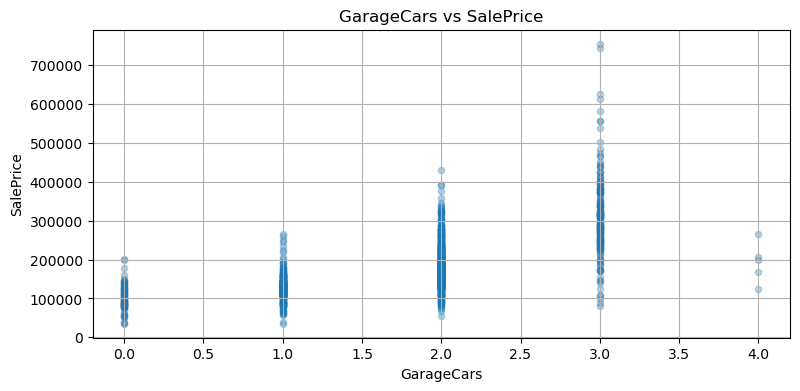

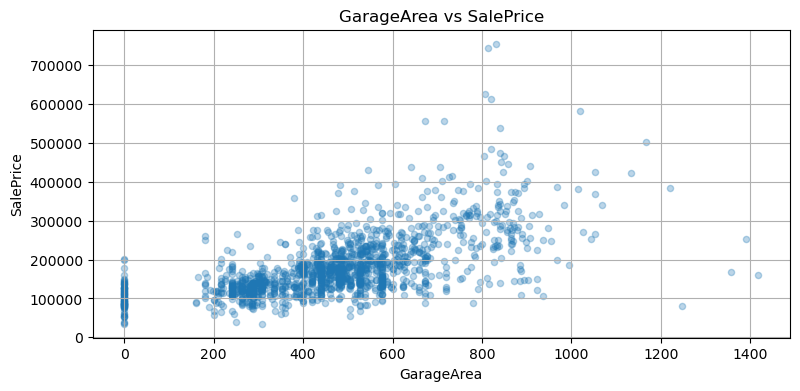

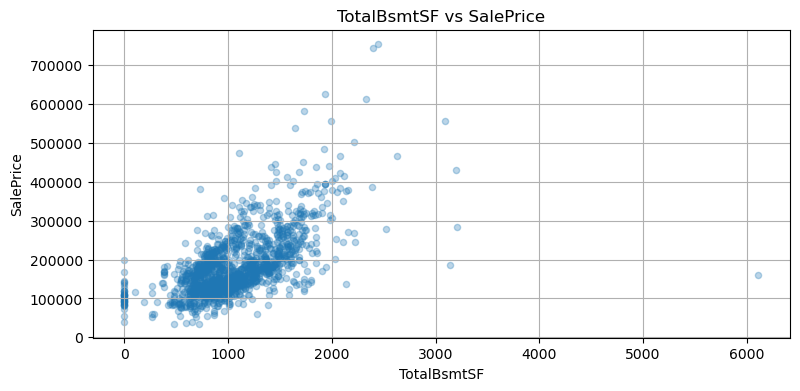

In [22]:
top_num = corr.index[1:6]
for c in top_num:
    df.plot(kind="scatter", x=c, y=y_col, alpha=0.3)
    plt.title(f"{c} vs {y_col}")
    plt.show()

## Категориальные признаки: вклад в целевую

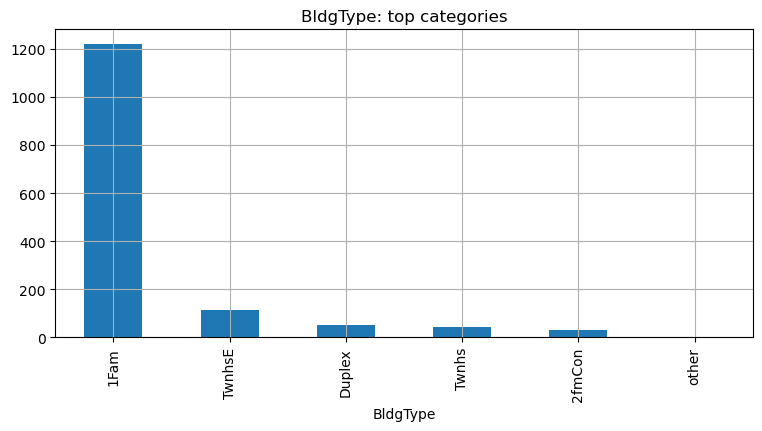

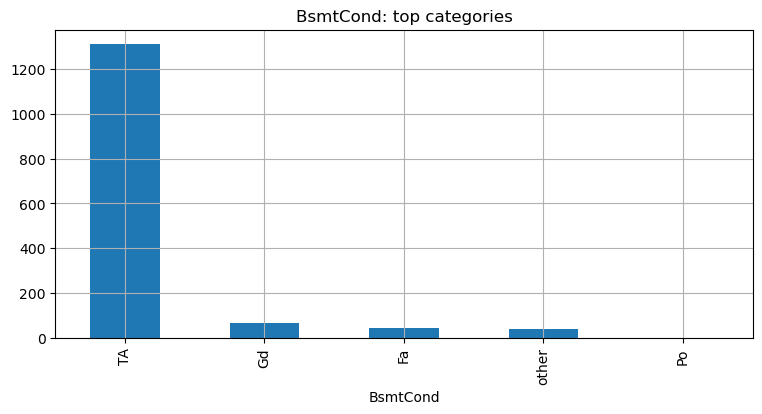

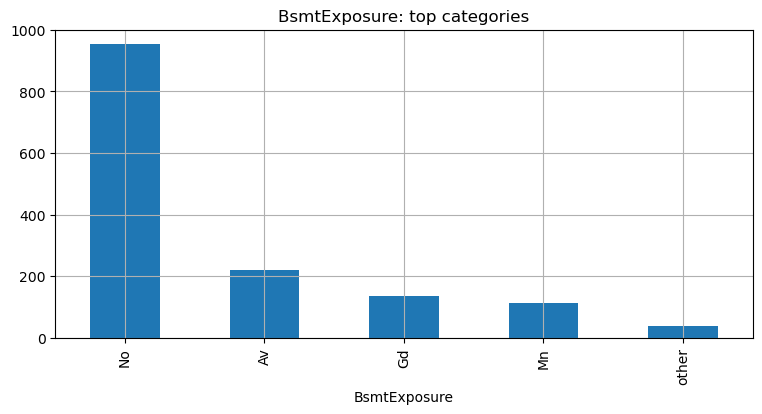

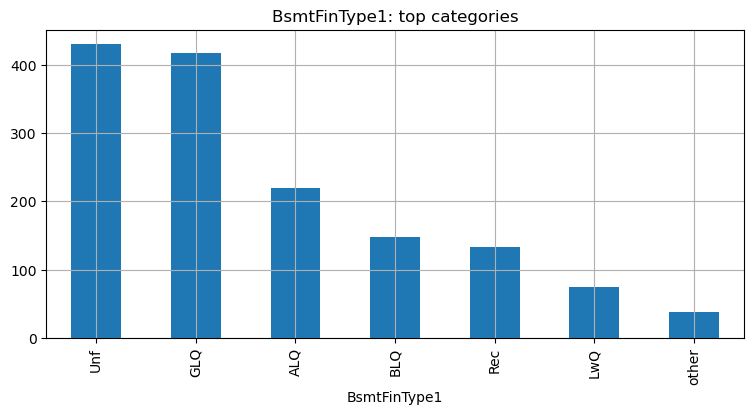

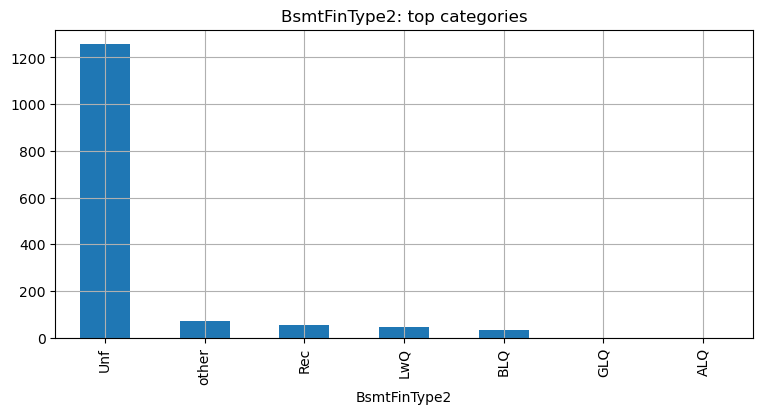

In [23]:
for c in cat_cols[:5]:
    df[c].value_counts().head(10).plot(kind="bar")
    plt.title(f"{c}: top categories")
    plt.show()

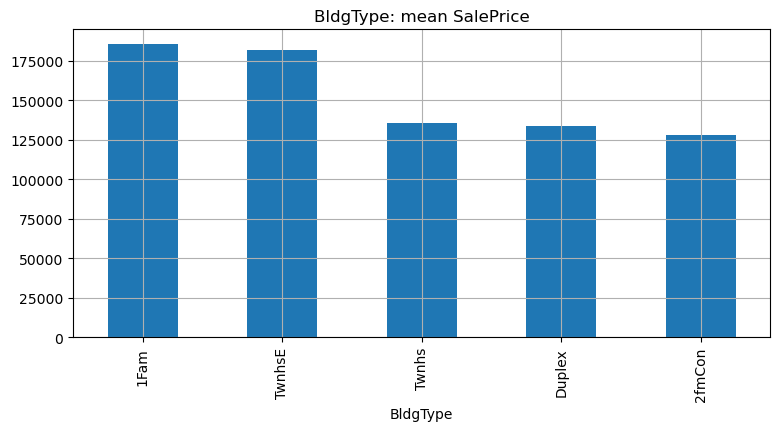

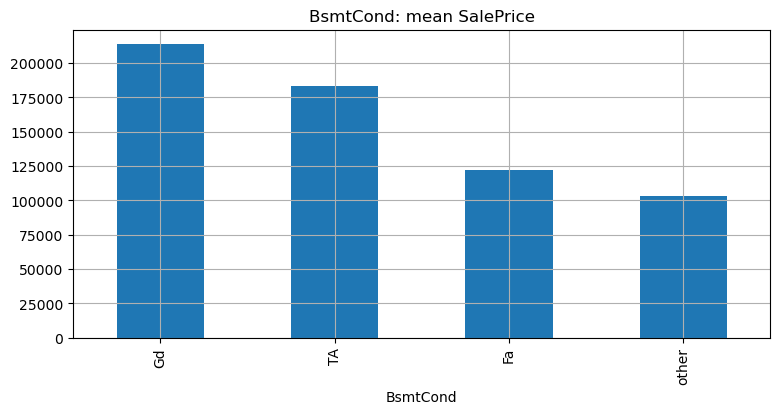

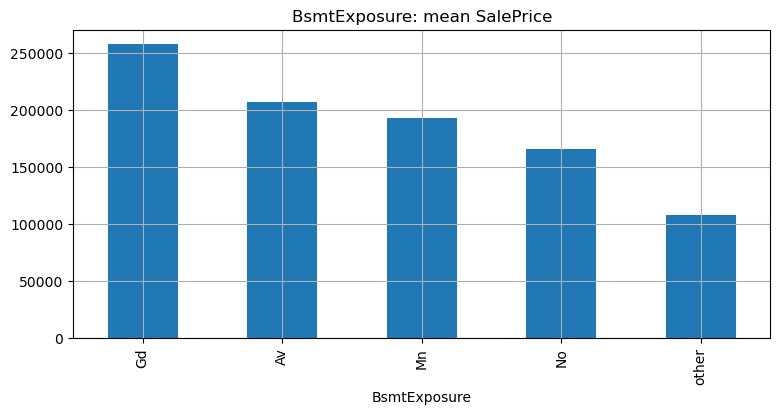

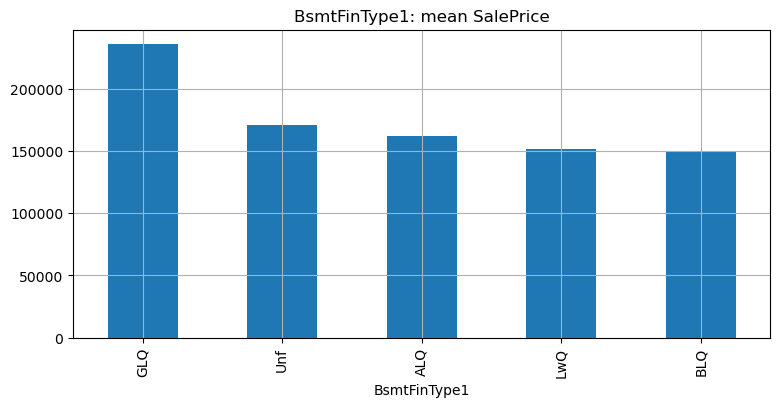

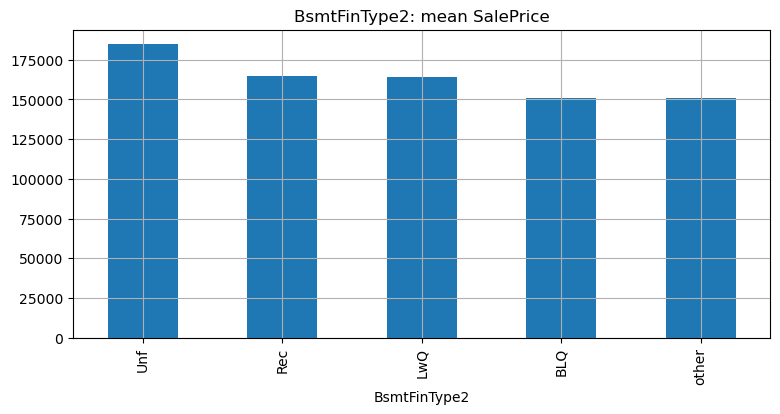

In [24]:
def bar_mean_target(col, top=5):
    t = df.groupby(col, observed=True)[y_col].mean().sort_values(ascending=False).head(top)
    t.plot(kind="bar")
    plt.title(f"{col}: mean {y_col}")
    plt.show()

for c in cat_cols[:5]:
    bar_mean_target(c)

## Работа с пропусками

In [25]:
for c in num_cols:
    if df[c].isna().any():
        df[c+"_na"] = df[c].isna().astype(int)
        df[c] = df[c].fillna(df[c].median())

In [26]:
for c in cat_cols:
    df[c] = df[c].cat.add_categories(["missing"]).fillna("missing")

In [31]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'